In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
%matplotlib inline

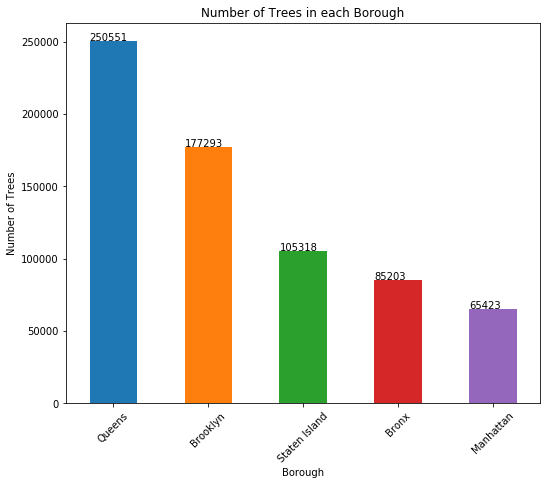

In [40]:
path = "../input/2015-street-tree-census-tree-data.csv"
fields = ['borough']
df = pd.read_csv(path, usecols=fields)
df = df['borough'].value_counts()
ax = df.plot(kind='bar', title="Number of Trees in each Borough", figsize=(8.5, 7))
ax.set_xlabel("Borough")
ax.set_ylabel("Number of Trees")
ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=45)
for p in ax.patches:
    ax.annotate(str(int(p.get_height())), (p.get_x(), p.get_height()))

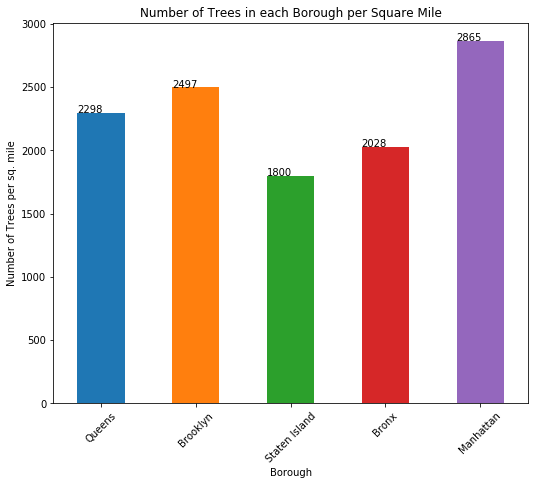

In [41]:
df['Queens'] = df['Queens']/109
df['Brooklyn'] = df['Brooklyn']/71
df['Staten Island'] = df['Staten Island']/58.5
df['Manhattan'] = df['Manhattan']/22.83
df['Bronx'] = df['Bronx']/42
ax = df.plot(kind='bar', title="Number of Trees in each Borough per Square Mile", figsize=(8.5, 7))
ax.set_xlabel("Borough")
ax.set_ylabel("Number of Trees per sq. mile")
ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=45)
for p in ax.patches:
    ax.annotate(str(int(p.get_height())), (p.get_x(), p.get_height()))

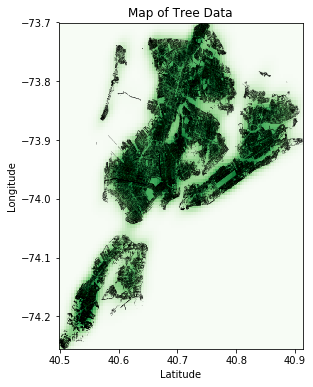

In [42]:
df2 = pd.read_csv(path, usecols=['latitude', 'longitude'])
latitudes = df2.latitude.tolist()
longitudes = df2.longitude.tolist()
xmin, xmax = min(latitudes), max(latitudes)
ymin, ymax = min(longitudes), max(longitudes)
X, Y = np.mgrid[xmin:xmax:100j, ymin:ymax:100j]
positions = np.vstack([X.ravel(), Y.ravel()])
values = np.vstack([latitudes, longitudes])
kernel = stats.gaussian_kde(values)
Z = np.reshape(kernel(positions).T, X.shape)
fig = plt.figure()
fig.set_size_inches(30, fig.get_figwidth(), forward=True)
ax = fig.add_subplot(111)
ax.imshow(np.rot90(Z), cmap=plt.cm.Greens,extent=[xmin, xmax, ymin, ymax])
ax.plot(latitudes, longitudes, 'k.', markersize=0.02)
ax.set_xlabel("Latitude")
ax.set_ylabel("Longitude")
ax.set_xlim([xmin, xmax])
ax.set_ylim([ymin, ymax])
ax.set_title("Map of Tree Data")
plt.show()

Credit: This kernel is an adaptation of https://github.com/janicedarling/CSC59969Project/blob/master/Exploring%20Data.ipynb